In [55]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [57]:
X = dataset.iloc[:, 1:2].values
Y = dataset.iloc[:, -1].values

In [58]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(np.array(Y).reshape(10, 1))

In [59]:
# Fitting SVR to the data set
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', gamma = 'auto')
Y = Y.ravel()
regressor.fit(X, Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [60]:
# Predicting a new result
Y_pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array(6.5).reshape(1,-1))))
Y_pred

array([170370.0204065])

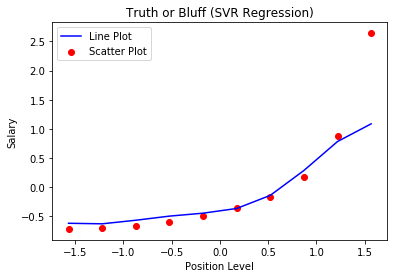

In [61]:
# Visualizing the SVR Regression results
plt.scatter(X, Y, color = 'red', label = 'Scatter Plot')
plt.plot(X, regressor.predict(X), color = 'blue', label = 'Line Plot')
plt.title('Truth or Bluff (SVR Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()